In [11]:
import pandas as pd
from skimage import io 
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans 
#Afin de relever les couleurs dominantes de notre image on va utiliser K-means 
def et_si_Monet(im):
    #On va tout d'abord commencer par mettre nos données dans un dataframe
    #Nos données dans ce cas là vont être les valeurs (r,g,b) de chaque pixel.
    df = pd.DataFrame()  # On crée notre Pandas dataframe
    #On mets nos valeurs dans notre dataframe
    df['r']=pd.Series(im[:,:,0].flatten())
    df['g']=pd.Series(im[:,:,1].flatten())  
    df['b']=pd.Series(im[:,:,2].flatten())  

    #Avant d'executer les k-means on va redimensionner les valeurs (r,g,b) grâce à la fonction whiten de scipy.
    #Cette fonction va diviser chaque élément par l'écart-type pour toutes les observation afin de lui donner une variance unitaire

    df['r_whiten'] = whiten(df['r'])  
    df['g_whiten'] = whiten(df['g'])  
    df['b_whiten'] = whiten(df['b'])  

    #On cherche les clusters dans nos données grâce à la focntion kmeans de scipy.
    #Cette fonction retourne les centres des clusters ainsi que la distortion
    #Dans notre cas on aura besoin  que des centres des clusters
    cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 5)

    #Nos cluster_centers sont composées de valeurs standardisées, il faut donc les transformer en valeur (r,g,b)
    #On récupère l'écart type sur chacun des axes
    r_std = df['r'].std() 
    g_std = df['g'].std() 
    b_std = df['b'].std()
    #On crée une liste vide où l'on va mettre nos valeurs (r,g,b) des couleurs clusturisées  
    colors=[] 
    for color in cluster_centers:  
        #print(color)
        #cr,cg,cb sont les valeurs rgb de chaque couleur clusterisé grâce à K-means
        cr = color[0]
        cg = color[1]
        cb = color[2]
        #On multiplie ces valeurs par l'écart type sur chacun des axes
        #Car la fonction whiten divise par l'écart type de chaque axe
        #On n'oublie pas de caster les résultats as int() avant des les rajouter dans notre liste de couleurs
        colors.append((int(cr*r_std), int(cg*g_std), int(cb*b_std)))
        
    #Et voilà !
    print(colors)
    plt.imshow([colors])  
    plt.show()  
    plt.imshow(im)

[(212, 220, 225), (79, 91, 112), (36, 34, 33), (148, 121, 71), (132, 156, 187)]


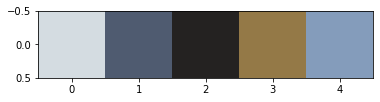

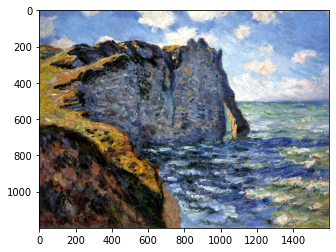

In [12]:
im = io.imread("the-manneport.jpg")
et_si_Monet(im)

[(16, 31, 11), (151, 177, 107), (104, 123, 78), (57, 88, 36), (208, 220, 209)]


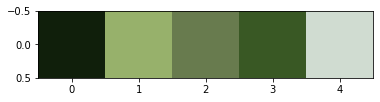

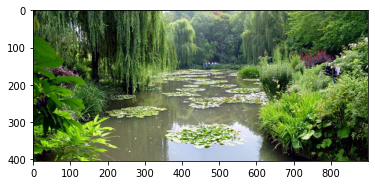

In [13]:
im = io.imread("download.jpeg")
et_si_Monet(im)

[(119, 148, 41), (55, 82, 22), (145, 160, 174), (8, 30, 6), (235, 242, 235)]


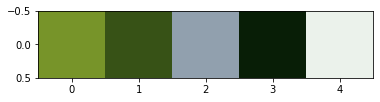

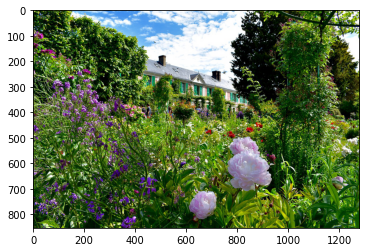

In [15]:
im = io.imread("download (1).jpeg")
et_si_Monet(im)

[(96, 54, 83), (16, 14, 17), (140, 145, 154), (249, 204, 213), (9, 73, 78)]


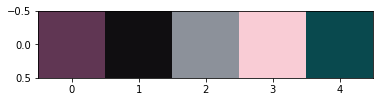

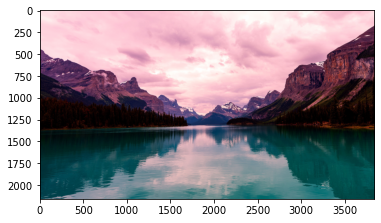

In [16]:
im = io.imread("download (2).jpeg")
et_si_Monet(im)